## Analysis 2
1. How many injuries in this dataset involve a skateboard?
2. Of those injuries, what percentage were male and what percentage were female?
3. What was the average age of someone injured in an incident involving a skateboard?


In [2]:
#Importing required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import datetime
import numpy as np

In [3]:
#Reading the required files
df1=pd.read_csv(r"NEISS Data/NEISS2014.csv")

In [5]:
#Filtering only the accidents involving skateboard
#From the documentation, product code for skateboard is 1333. Filtering data if prod1 or prod2 is a skateboard
df2=df1[(df1['prod1']==1333)|(df1['prod2']==1333)]

In [6]:
print("The number of injuries involving a skateboard is "+str((len(df2.index))))

The number of injuries involving a skateboard is 495


#### Of those injuries, what percentage were male and what percentage were female?

In [7]:
#Calculating percentage of male and female involved in skateboard accident
df3 = df2.groupby(['sex'])['sex'].agg({'Freq': 'count'}).reset_index()


In [8]:
df3['Percentage']=round((df3['Freq']/len(df2))*100,2)

In [9]:
print(df3)

      sex  Freq  Percentage
0  Female    89       17.98
1    Male   406       82.02


#### Visually representing percentage distribution of sex (Alternate method)

(-1.1061606342777075,
 1.1039393161990005,
 -1.105650819857938,
 1.1002690866599019)

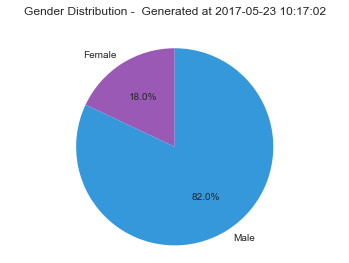

In [10]:
colors=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
plt.pie(
    df3['Freq'],
    labels=df3['sex'],
    shadow=False,
    startangle=90,
    colors=colors,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )


# View the plot drop above
plt.title("Gender Distribution -  Generated at "+str(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')),y=1.08)
plt.axis('equal')


In [11]:
#Using an alternate method to check skateboard related injuries

In [12]:
df9=df1[(df1['narrative'].str.contains('SKATEBOARD'))]

In [13]:
print('The number of injuries involving a skateboard by checking the narrative description is '+str((len(df9.index))))

The number of injuries involving a skateboard by checking the narrative description is 466


In [14]:
#Calculating percentage of male and female involved in skateboard accident
df10 = df9.groupby(['sex'])['sex'].agg({'Freq': 'count'}).reset_index()
df10['Percentage']=round((df10['Freq']/len(df9))*100,2)
print(df10)

      sex  Freq  Percentage
0  Female    82        17.6
1    Male   384        82.4


##### For the second part of the analysis, dataframe df2 is considered (involving 495 records)

#### What was the average age of someone injured in an incident involving a skateboard?

In [15]:
#Based on the coding scheme, ages less than two years are coded as 200 (2 followed by months) and above
#We can code values greater than 200 as 1 and retain other values 
#Creating a new column for this purpose
df2.loc[df2['age']>=200,'age_year'] = 1
df2.loc[df2['age']<200,'age_year'] = df2['age']

C:\Users\Harikrishna\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Harikrishna\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
## Average Age of a person involved in a skateboard
avgage=round(df2['age_year'].mean(),0)
print('The average age of a person in a skateboard accident is '+str(avgage))

The average age of a person in a skateboard accident is 18.0


In [17]:
#Verification (proof) for the second part of problem
#This verification ensures that there are no skateboard accidents involing people less than 2 years of age (does not alter mean)

In [18]:
df_new=df1[df1['age']>200]

In [19]:
df_new_skate=df_new[(df_new['prod1']==1333)|(df_new['prod2']==1333)]

In [20]:
print('The number of injuries due to skateboard incidents is '+str(len(df_new_skate.index)))

The number of injuries due to skateboard incidents is 0


In [21]:
print('This proves that the average age calculated is not altered by coding age_year as 1 if people are less than 2 years of age')

This proves that the average age calculated is not altered by coding age_year as 1 if people are less than 2 years of age
